# 사인파형 시계열을 입력으로 다음 스텝의 출력을 예측
# 3개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

In [26]:
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline

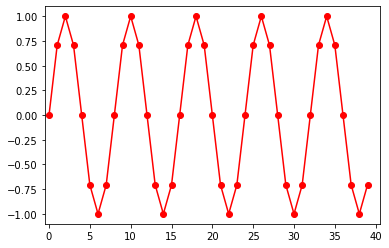

In [34]:
#s = np.sin(2 * np.pi * 0.125 * np.arange(40))
#plt.plot(s,'ro-')
#plt.xlim(-0.5, 40.5)
#plt.ylim(-1.1, 1.1)

#plt.show()

원래의 시계열 벡터를 Toeplitz 행렬 형태로 변환

(대각선 위의 성분들이 같은 정사각 행렬)

In [4]:
from scipy.linalg import toeplitz
S = np.fliplr(toeplitz(np.r_[s[-1], np.zeros(s.shape[0] - 2)], s[::-1]))
S[:5, :3]

array([[ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00],
       [ 7.07106781e-01,  1.00000000e+00,  7.07106781e-01],
       [ 1.00000000e+00,  7.07106781e-01,  1.22464680e-16],
       [ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01],
       [ 1.22464680e-16, -7.07106781e-01, -1.00000000e+00]])

In [5]:
X_train = S[:-1, :3][:, :, np.newaxis]
Y_train = S[:-1, 3]
X_train.shape, Y_train.shape

((18, 3, 1), (18,))

In [6]:
X_train[:4]

array([[[ 0.00000000e+00],
        [ 7.07106781e-01],
        [ 1.00000000e+00]],

       [[ 7.07106781e-01],
        [ 1.00000000e+00],
        [ 7.07106781e-01]],

       [[ 1.00000000e+00],
        [ 7.07106781e-01],
        [ 1.22464680e-16]],

       [[ 7.07106781e-01],
        [ 1.22464680e-16],
        [-7.07106781e-01]]])

In [7]:
Y_train[:4]

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00])

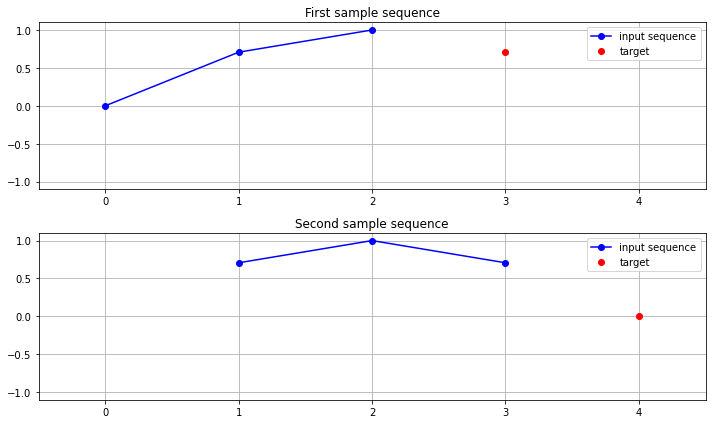

In [8]:
plt.figure(figsize=(10,6))

plt.subplot(211)
plt.plot([0, 1, 2], X_train[0].flatten(), 'bo-', label="input sequence")
plt.plot([3], Y_train[0], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("First sample sequence")

plt.subplot(212)
plt.plot([1, 2, 3], X_train[1].flatten(), 'bo-', label="input sequence")
plt.plot([4], Y_train[1], 'ro', label="target")
plt.xlim(-0.5, 4.5)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.grid()
plt.title("Second sample sequence")

plt.tight_layout()
plt.show()





# RNN으로 해결 - SimpleRNN() 사용

In [10]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

#seed = 2020
#np.random.seed(seed)

Using TensorFlow backend.


In [11]:
#model = Sequential()
#model.add(SimpleRNN(10, input_shape=(3, 1)))
#model.add(Dense(1, activation="linear"))
#model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [12]:
#model.compile(loss='mse', optimizer='sgd')

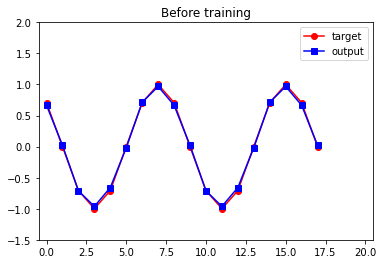

In [24]:
#plt.plot(Y_train, 'ro-', label="target")
#plt.plot(model.predict(X_train[:, :, :]), 'bs-', label="output")
#plt.xlim(-0.5, 20.5)
#plt.ylim(-1.5, 2.0)
#plt.legend()
#plt.title("Before training")
#plt.show()

In [36]:
#history = model.fit(X_train, Y_train, epochs=100)

<function matplotlib.pyplot.show(*args, **kw)>

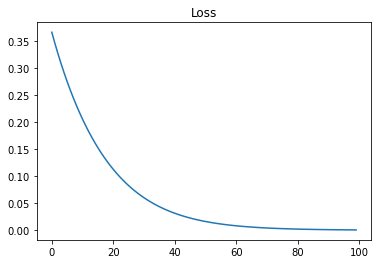

In [37]:

plt.plot(history.history["loss"])
plt.title("Loss")
plt.show

# RNN을 이용한 텍스트 생성

In [38]:
import numpy as np
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [40]:
seed=2020
np.random.seed(seed)

In [41]:
text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [44]:
t = Tokenizer()

In [45]:
dir(t)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 'char_level',
 'document_count',
 'filters',
 'fit_on_sequences',
 'fit_on_texts',
 'get_config',
 'index_docs',
 'index_word',
 'lower',
 'num_words',
 'oov_token',
 'sequences_to_matrix',
 'sequences_to_texts',
 'sequences_to_texts_generator',
 'split',
 'texts_to_matrix',
 'texts_to_sequences',
 'texts_to_sequences_generator',
 'to_json',
 'word_counts',
 'word_docs',
 'word_index']

In [46]:
t.fit_on_texts([text])

In [47]:
# 대체 t에서 사용사능한 method및 attribute
# 사용되느 빈도에 따라 순서가 결정
t.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [58]:

sequences = []
for line in text.split('\n'): # \n을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [59]:
max_len = max(len(s) for s in sequences) 

In [60]:
vocab_size = len(t.word_index) + 1
 

In [61]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, SimpleRNN

In [62]:
embedding = Embedding(vocab_size, 10, input_length=max_len-1) # 레이블을 분리하였으므로 X의 길이는 5
rnn = SimpleRNN(32)
output = Dense(vocab_size, activation='softmax')

In [83]:

history = model.fit(X, y, epochs=200, verbose=0)
history.history['accuracy'][-1]

ValueError: Error when checking target: expected dense_2 to have shape (12,) but got array with shape (1,)

In [72]:

sequences = []
for line in text.split('\n'): # \n을 기준으로 문장 토큰화
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences))

학습에 사용할 샘플의 개수: 11


In [78]:
max_len = max(len(s) for s in sequences) 
print('샘플의 최대 길이 :', max_len)

샘플의 최대 길이 : 6


In [75]:
X = sequences[:,:-1]
y = sequences[:,-1]

In [74]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [80]:

model = Sequential()
model.add(embedding)
model.add(rnn)
model.add(output)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 10)             120       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                1376      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                396       
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
df = sm.datasets.get_rdataset("deaths", "MASS").data
df.head()

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014
